# Week 2: Data Preparation

### What's on this week
1. [Resuming from week 1](#resume)
2. [Exploring data](#explore)
3. [Modifying and correcting data](#moddata)
---

The practical note for this week introduces you to data preparation using Python and the libraries we installed last week. Data preparation is the most important step in any data mining project and it determines the "make or break" of a data mining project. In a real-life project, 70-80% of your time will be spent on this step.

There are a number of process performed in this step. Some of them are:

1. Understanding data
2. Dealing with missing values
3. Noise and errorneous data cleaning
4. Data formatting (typically this depends on your model)
5. Feature engineering

## 1. Resuming from week 1 <a name="resume"></a>
Last week, we learned about how to load the PVA97NK dataset and review overall information about fields in the dataset. Before we start this week's practical, ensure your code looks like this:

In [1]:
import pandas as pd

# read the pva97nk dataset
df = pd.read_csv('pva97nk.csv')

# show all columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
TargetB             9686 non-null int64
ID                  9686 non-null int64
TargetD             4843 non-null float64
GiftCnt36           9686 non-null int64
GiftCntAll          9686 non-null int64
GiftCntCard36       9686 non-null int64
GiftCntCardAll      9686 non-null int64
GiftAvgLast         9686 non-null float64
GiftAvg36           9686 non-null float64
GiftAvgAll          9686 non-null float64
GiftAvgCard36       7906 non-null float64
GiftTimeLast        9686 non-null int64
GiftTimeFirst       9686 non-null int64
PromCnt12           9686 non-null int64
PromCnt36           9686 non-null int64
PromCntAll          9686 non-null int64
PromCntCard12       9686 non-null int64
PromCntCard36       9686 non-null int64
PromCntCardAll      9686 non-null int64
StatusCat96NK       9686 non-null object
StatusCatStarAll    9686 non-null int64
DemCluster          9686 non-null int64
De

## 2. Exploring data<a name="explore"></a>

Let's take a closer look on the data. The dataframe info output above reveals a number of important information from our dataset:
1. Number of rows (or entries): 9686
2. Number of fields (or columns): 28
3. Number of entries and data type for each column: 9686 entries and integer number for Target B; 7906 entries and floating point for GiftAvgCard36.

### 2.1. Taking a closer look on each column

Let's take a closer look on each column. Take "DemAge" column for example. To grab an overall knowledge of the column, we can use the `.describe()` method.

In [2]:
df['DemAge'].describe()

count    7279.000000
mean       59.150845
std        16.516400
min         0.000000
25%        47.000000
50%        60.000000
75%        73.000000
max        87.000000
Name: DemAge, dtype: float64

If we want to check the unique values and how many records for each value, we could use `.unique()` and `.value_counts()` method.

In [3]:
df['DemAge'].unique()

array([ nan,  67.,  53.,  47.,  58.,  39.,  50.,  45.,  80.,  61.,  76.,
        41.,  75.,  59.,  51.,  31.,  54.,  70.,  42.,  65.,  81.,  38.,
        56.,  69.,  52.,  33.,  73.,  71.,  29.,  60.,  83.,  43.,  35.,
        77.,  44.,  72.,  64.,  34.,  55.,  37.,  57.,  46.,  49.,  32.,
        66.,  87.,  40.,  79.,  25.,  63.,  62.,  48.,  68.,  86.,  23.,
        27.,  74.,  78.,  85.,  26.,   7.,  36.,  82.,  24.,  17.,  30.,
        84.,  21.,  28.,  22.,  19.,  16.,  14.,   6.,   0.,   2.,  20.,
        18.,  15.,   4.])

In [4]:
df['DemAge'].value_counts()

73.0    216
67.0    215
75.0    203
49.0    201
57.0    187
77.0    183
55.0    182
65.0    181
47.0    179
69.0    178
71.0    173
51.0    167
79.0    165
45.0    164
74.0    162
53.0    152
59.0    150
76.0    139
43.0    138
63.0    138
81.0    136
61.0    136
50.0    131
37.0    125
41.0    124
78.0    123
80.0    123
72.0    122
70.0    116
68.0    116
       ... 
84.0     70
27.0     69
86.0     68
33.0     65
31.0     59
36.0     57
38.0     53
17.0     46
34.0     42
29.0     33
7.0      32
32.0     31
30.0     24
26.0     19
28.0     19
25.0     17
23.0     12
22.0      7
24.0      6
16.0      5
21.0      5
19.0      4
6.0       3
14.0      1
0.0       1
2.0       1
20.0      1
4.0       1
18.0      1
15.0      1
Name: DemAge, Length: 79, dtype: int64

From these outputs, we reveals a number of data problems with "DemAge" column.
1. There are only 7279 records in "DemAge" column, while the total number of records in this data set is 9686. This indicates missing values in "DemAge". This observation is also visible through the NaN printed by ```.unique()``` method.
2. One record in "DemAge" has 0 as value. It indicates an errorneous data in this column.

We will rectify these problems later in section 3.

Could you spot data problems in other columns using ```.describe()```, ```.unique()``` and ```.value_counts()```?

### 2.2. Grouping and plotting distributions of columns
Another way to gain more insights of the data is by grouping and comparing and plotting their distribution.

We could perform grouping using `.groupby()` method. Grouping is commonly used to see whether there is a trend between two or more different fields. For example, let's check whether there is a specific correlation between age (DemAge) and tendency to be a lapsing donor (TargetB).

In [5]:
df.groupby(['TargetB'])['DemAge'].mean()

TargetB
0    58.304444
1    59.979070
Name: DemAge, dtype: float64

We could see that average age of lapsing donors is slightly higher than the non-lapsing donors.

Other than `.mean()`, we could also perform grouping with other method such as `.value_counts()` and `.median()`.

In [6]:
df.groupby(['TargetB'])['DemGender'].value_counts()

TargetB  DemGender
0        F            2614
         M            1963
         U             266
1        F            2609
         M            1962
         U             272
Name: DemGender, dtype: int64

While all of the methods we have used so far are very useful in providing information about the data, data mining professionals commonly visualize these information in charts for easier presentation. In python, we could do that using `seaborn` and `matplotlib` library.

Firstly, let's import them.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/hendi/Documents/Tutoring/dataminingtutorials/my_env/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


A very common information to visualize is distribution of a field/column. There are a number options to do it in seaborn/matplotlib. For interval/numerical variables, we could use `distplot`. Let's try that for "DemAge". `distplot` is sensitive towards missing values (which are present in "DemAge"), thus we have to drop them using `dropna()` method.

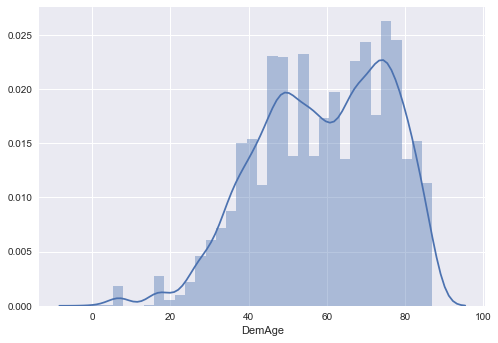

In [8]:
# dropna is used because 'DemAge' has missing values
dg = sns.distplot(df['DemAge'].dropna())
plt.show()

For nominal/categorical variables, we can use `countplot` to build a bar chart to show distribution of each values.

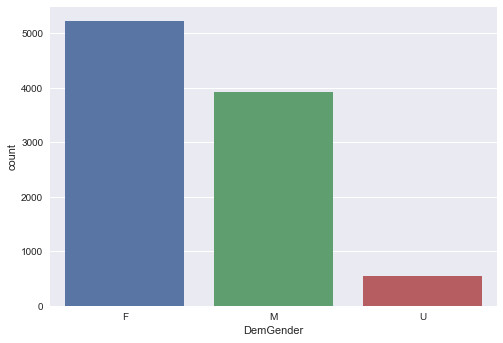

In [9]:
dg = sns.countplot(data=df, x='DemGender')
plt.show()

Could you visualize other columns using `distplot` and `countplot`?

## 3. Modifying and Correcting Data<a name="moddata"></a>

In [10]:
import numpy as np

# impute missing values in DemAge with its mean
df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)

# change DemCluster from interval/integer to nominal/str
df['DemCluster'] = df['DemCluster'].astype(str)

# change DemHomeOwner into binary 0/1 variable
dem_home_owner_map = {'U':0, 'H': 1}
df['DemHomeOwner'] = df['DemHomeOwner'].map(dem_home_owner_map)

# denote miss values in DemMidIncome
mask = df['DemMedIncome'] < 1
df.loc[mask, 'DemMedIncome'] = np.nan

df['DemMedIncome'].replace(0, np.nan, inplace=True)

# impute med income using average strategy
df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace=True)

# impute gift avg card 36 using average strategy
df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace=True)

# drop ID and the unused target variable
df.drop(['ID', 'TargetD'], axis=1, inplace=True)

## End notes and next week
This week, we learned how to use Python `pandas` to perform data cleaning and preprocessing. We also learned about basic `seaborn` and `matplotlib` methods for visualizing data distribution in a column.

Next week, we will focus on performing predictive classification modelling using decision trees.